Visualize with a grouped bar chart (see above) the gas mileage distribution of all the models by production origin. In other words, you will create a chart in which each gas mileage value (expressed in miles per gallon or ‘mpg’) is associated with 3 bars (one for each origin: US, Europe, Japan) and show how the distributions of the gas mileage values compare across regions. For that you will discretize the range of possible gas mileage values in 3 mpg increments.

In [51]:
%matplotlib inline

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# read in a csv file: pd.read_csv(), get the file path of the csv file 
# and paste into the function call
df = pd.read_csv("Datasets/old_cars.csv")

df.head(3)

,Car,MPG,Displacement,Horsepower,Weight,Model,Origin
0,AMC Ambassador Brougham,13.0,360.0,175,3821,73,US
1,AMC Ambassador DPL,15.0,390.0,190,3850,70,US
2,AMC Ambassador SST,17.0,304.0,150,3672,72,US


In [53]:
df.describe()

,MPG,Displacement,Horsepower,Weight,Model
count,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,193.425879,102.894472,2970.424623,76.010050
std,7.815984,104.269838,40.269544,846.841774,3.697627
min,9.000000,68.000000,0.000000,1613.000000,70.000000
25%,17.500000,104.250000,75.000000,2223.750000,73.000000
50%,23.000000,148.500000,92.000000,2803.500000,76.000000
75%,29.000000,262.000000,125.000000,3608.000000,79.000000
max,46.600000,455.000000,230.000000,5140.000000,82.000000


In [54]:
df["mpg_bracket"] = pd.cut(df["MPG"], bins=[9,12,15,18,21,24,27,30,33,36,39,42,45,48], right=False)

In [55]:
grouped = df.groupby(["mpg_bracket", "Origin"])["Car"].count()
grouped.head()

mpg_bracket  Origin
[9, 12)      US         7
[12, 15)     US        46
[15, 18)     Europe     3
             US        51
[18, 21)     Europe     6
Name: Car, dtype: int64

In [56]:
labels = grouped.reset_index()["mpg_bracket"].drop_duplicates().values
labels

[[9, 12), [12, 15), [15, 18), [18, 21), [21, 24), ..., [33, 36), [36, 39), [39, 42), [42, 45), [45, 48)]
Length: 13
Categories (13, interval[int64]): [[9, 12) < [12, 15) < [15, 18) < [18, 21) ... [36, 39) < [39, 42) < [42, 45) < [45, 48)]

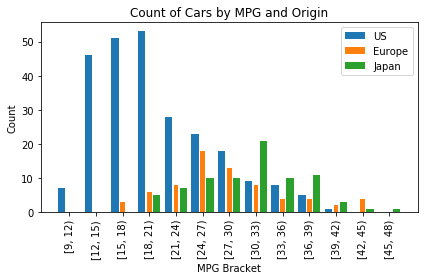

In [57]:
# adapted from https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html
origins = ["US", "Europe", "Japan"]
origin = "US"

counts = [[], [], []]
for bracket in labels:
    for i, origin in enumerate(origins):
        # get the count for the origin
        if (bracket, origin) in grouped.index:
            #print(bracket, origin, grouped.loc[(bracket, origin)])
            counts[i].append(grouped.loc[(bracket, origin)])
        else:
            #print(bracket, origin, 0)
            counts[i].append(0)

us_counts, eu_counts, japan_counts = counts

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - 4/5*width, us_counts, 4/5*width, label='US')
rects2 = ax.bar(x, eu_counts, width/2, label='Europe')
rects3 = ax.bar(x + 4/5*width, japan_counts, 4/5*width, label='Japan')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_xlabel('MPG Bracket')
ax.set_title('Count of Cars by MPG and Origin')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90)
ax.legend()

#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)
#ax.bar_label(rects3, padding=3)

fig.tight_layout()

plt.show()

Visualize for each production origin the temporal evolution of the gas mileage from 1970 to 1982 using a line chart. Each data point will correspond to the annual average of the gas mileage for a given origin and each curve will comprise 13 points. Assign a different color to each curve and plot all three curves in the same figure.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# read in a csv file: pd.read_csv(), get the file path of the csv file 
# and paste into the function call
df = pd.read_csv("Datasets/old_cars.csv")

df.head(3)

,Car,MPG,Displacement,Horsepower,Weight,Model,Origin
0,AMC Ambassador Brougham,13.0,360.0,175,3821,73,US
1,AMC Ambassador DPL,15.0,390.0,190,3850,70,US
2,AMC Ambassador SST,17.0,304.0,150,3672,72,US


In [75]:
# 1) select only cars from one origin
USdf = df[df["Origin"] == "US"]
EUdf = df[df["Origin"] == "Europe"]
JAdf = df[df["Origin"] == "Japan"]


# 2) get the average mpg for each year
# 3) save that data in a variable
grouped_df = USdf.groupby("Model")["MPG"]
mean_USdf = grouped_df.mean()
grouped_df = EUdf.groupby("Model") ["MPG"]
mean_EUdf = grouped_df.mean()
grouped_df = JAdf.groupby("Model") ["MPG"]
mean_JAdf = grouped_df.mean()



# 4) repeat steps 1-3 for the other origins
mean_USdf

Model
70    15.272727
71    18.100000
72    16.277778
73    15.034483
74    18.333333
75    17.550000
76    19.431818
77    20.722222
78    21.772727
79    23.478261
80    25.914286
81    27.530769
82    29.450000
Name: MPG, dtype: float64

Text(0.5, 1.0, 'MPG by Year by Origin')

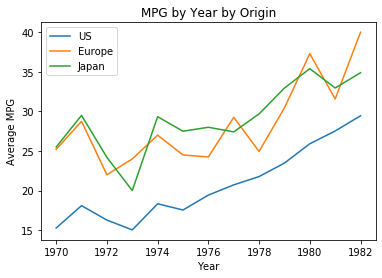

In [84]:
# Plot one of the countries mpg values over time

plt.plot(range(1970,1983), mean_USdf, label='US')
plt.plot(range(1970,1983), mean_EUdf,label='Europe')
plt.plot(range(1970,1983), mean_JAdf,label='Japan')  
plt.legend()
plt.xlabel('Year')
plt.ylabel('Average MPG')
plt.title('MPG by Year by Origin')


So far, we have only visualized a single attribute (ie. the gas mileage). For this third task, visualize the relationship between horsepower and gas mileage in a scatter plot. The horizontal axis should correspond to ‘Horsepower’, the vertical axis to ‘MPG’ and each data point to a particular car. Apply to the scatter plot a color coding indicating the 'Year'. Use for that purpose the color palette viridis

Text(0.5, 1.0, 'Horsepower vs MPG')

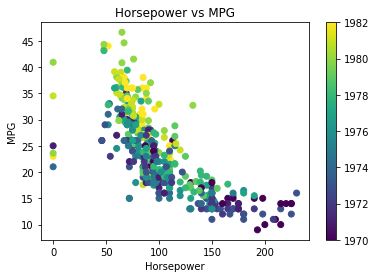

In [100]:
plt.scatter(df["Horsepower"], df["MPG"], c=df["Model"]+1900, cmap="viridis")
plt.colorbar()
plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.title('Horsepower vs MPG')

Visualize gas mileage, weight, horsepower, and engine volume in a scatter plot matrix. Color code the individual data points by country of origin.
Use 

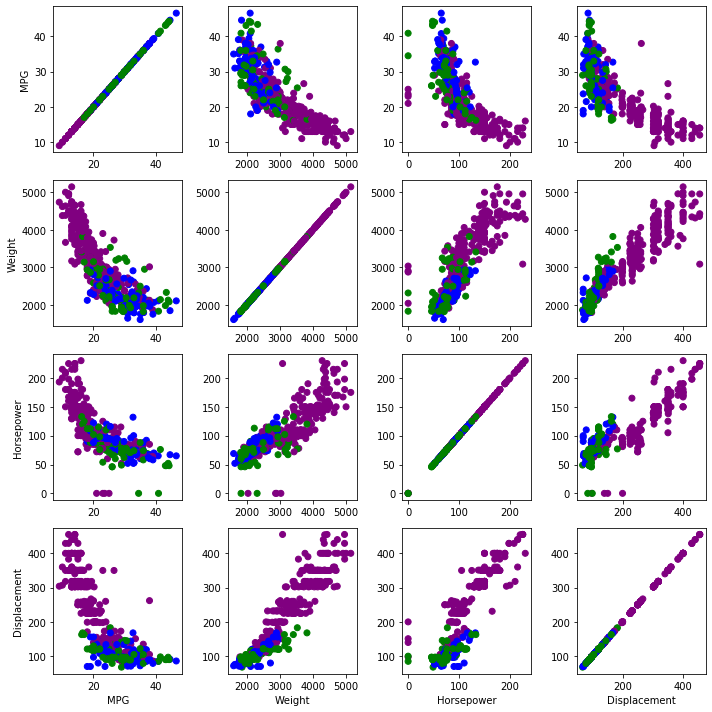

In [116]:
columns = ["MPG", "Weight", "Horsepower", "Displacement"]

# set up a scatter plot matrix
fig, ax = plt.subplots(nrows=4, ncols=4,figsize=(10,10))

# ax contains a matrix of plots
# loop over the columns (nested loop to create every pair)
for row, r_col in enumerate(columns):
    for col, c_col in enumerate(columns):
        # create a scatter plot of r_col vs c_col and plot it on axis ax[row, col]
        # use country of origin for color
        ax[row,col].scatter(df[c_col], df[r_col], c=df["Origin"].replace({"US":"purple", "Europe":"green", "Japan":"blue"}))
        ax[row, 0].set_ylabel(r_col)
        ax[-1,col].set_xlabel(c_col)

plt.tight_layout()